__<font size="6">PHASE 2 PROJECT</font>__ 

__<span style="font-size: 30px;">Film Making Entry Analysis</span>__


- __<font size="5">Business Understanding</font>__ 

**1. The Problem** 


The company is establishing a new movie studio to expand into original content production. An analysis of current box office trends is underway to identify high-performing film genres and translate these findings into strategic creative direction.

**2. Primary Goal**

Determine what types of films are currently performing best at the box office
to inform strategic decisions for our new movie studio.

Key Questions:
- Which film genres generate the highest box office revenue?
- What budget ranges are most profitable?
- What are the characteristics of successful films in recent years?


- __<font size="5">Data Understanding</font>__ 

- __<font size="5">Data Preparation</font>__ 

***<span style="font-size: 18px;">1. Importing Libraries</span>***

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns


***<span style="font-size: 18px;">2. Loading the Data</span>***


2.1 Decompressing the tmdb file

In [96]:
gzfile_path = 'tmdb.movies.csv.gz'
output_name = gzfile_path.replace('.gz', '')

with gzip.open(gzfile_path, 'rt') as gz_file:
    with open(output_name, 'w') as csv_file:
        csv_file.write(gz_file.read())

2.2 Loading the decompressed file

In [97]:
# Veiwing the data
tmdb_data = pd.read_csv("tmdb.movies.csv")
tmdb_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


2.3 Decompressing the tn file

In [98]:
gzfile_path = 'tn.movie_budgets.csv.gz'
output_name = gzfile_path.replace('.gz', '')

with gzip.open(gzfile_path, 'rt') as gz_file:
    with open(output_name, 'w') as csv_file:
        csv_file.write(gz_file.read())

2.4 Loading the decompressed tn file

In [99]:
tn_data= pd.read_csv("tn.movie_budgets.csv")
tn_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


2.5 Checking for issues on both tables

In [100]:
# Check data types
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [101]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [102]:
# Basic info
tmdb_data.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,"26,517","26,517","26,517","26,517","26,517"
mean,"13,258","295,050",3,6,194
std,"7,655","153,662",4,2,961
min,0,27,1,0,1
25%,"6,629","157,851",1,5,2
50%,"13,258","309,581",1,6,5
75%,"19,887","419,542",4,7,28
max,"26,516","608,444",81,10,"22,186"


In [103]:
tn_data.describe()

,id
count,"5,782"
mean,50
std,29
min,1
25%,25
50%,50
75%,75
max,100


In [104]:
# Check for missing values first
tmdb_data.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [105]:
tn_data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

- __<font size="5">Data Analysis</font>__ 

***<span style="font-size: 18px;">1. Cleaning tmdb</span>***

In [106]:
# First check of data shape before Cleaning
tmdb_data.shape

(26517, 10)

In [107]:
# Dropping Columns that are not needed
tmdb_data = tmdb_data.drop(columns=['Unnamed: 0', 'genre_ids', 'release_date', 'title', 'original_title'])
tmdb_data

,id,original_language,popularity,vote_average,vote_count
0,12444,en,34,8,10788
1,10191,en,29,8,7610
2,10138,en,29,7,12368
3,862,en,28,8,10174
4,27205,en,28,8,22186
...,...,...,...,...,...
26512,488143,en,1,0,1
26513,485975,en,1,0,1
26514,381231,en,1,0,1
26515,366854,en,1,0,1


In [108]:
# Convert to whole number
tmdb_data['vote_count'] = tmdb_data['vote_count'].astype(int)

# Convert to decimal
tmdb_data['vote_average'] = tmdb_data['vote_average'].round(1)

# Convert popularity to whole numbers
tmdb_data['popularity'] = tmdb_data['popularity'].astype(int)

print(tmdb_data['vote_count'])
print(tmdb_data['vote_average'])
print(tmdb_data['popularity'])

0        10788
1         7610
2        12368
3        10174
4        22186
         ...  
26512        1
26513        1
26514        1
26515        1
26516        1
Name: vote_count, Length: 26517, dtype: int32
0       8 
1       8 
2       7 
3       8 
4       8 
        ..
26512   0 
26513   0 
26514   0 
26515   0 
26516   0 
Name: vote_average, Length: 26517, dtype: float64
0        33
1        28
2        28
3        28
4        27
         ..
26512     0
26513     0
26514     0
26515     0
26516     0
Name: popularity, Length: 26517, dtype: int32


In [109]:
# Remove duplicates
tmdb_data = tmdb_data.drop_duplicates(subset=['id'])

# Remove rows with missing critical information
tmdb_data = tmdb_data.dropna(subset=['id', 'original_language', 'popularity', 'vote_average', 'vote_count'])
tmdb_data

,id,original_language,popularity,vote_average,vote_count
0,12444,en,33,8,10788
1,10191,en,28,8,7610
2,10138,en,28,7,12368
3,862,en,28,8,10174
4,27205,en,27,8,22186
...,...,...,...,...,...
26512,488143,en,0,0,1
26513,485975,en,0,0,1
26514,381231,en,0,0,1
26515,366854,en,0,0,1


In [110]:
# Remove movies with 0 vote_count or vote_average
tmdb_data = tmdb_data[tmdb_data['vote_count'] > 0]
tmdb_data = tmdb_data[tmdb_data['vote_average'] > 0]
tmdb_data

,id,original_language,popularity,vote_average,vote_count
0,12444,en,33,8,10788
1,10191,en,28,8,7610
2,10138,en,28,7,12368
3,862,en,28,8,10174
4,27205,en,27,8,22186
...,...,...,...,...,...
26499,589607,en,0,1,1
26500,561932,en,0,1,1
26501,558305,en,0,1,1
26502,551756,en,0,1,1


In [111]:
# Sort by release date
tmdb_data = tmdb_data.sort_values('popularity', ascending=False)
tmdb_data

,id,original_language,popularity,vote_average,vote_count
23811,299536,en,80,8,13948
11019,245891,en,78,7,10081
23812,324857,en,60,8,4048
11020,122917,en,53,7,8392
5179,24428,en,50,8,19673
...,...,...,...,...,...
12950,300695,en,0,4,6
12951,343801,en,0,7,4
12952,306220,en,0,6,5
12953,336893,en,0,8,6


In [112]:
# Final check of data shape
tmdb_data.shape

(25367, 5)

***<span style="font-size: 18px;">1. Cleaning tmdb</span>***

In [113]:
# First check of data shape before Cleaning
tn_data.shape

(5782, 6)

In [114]:
# Renaming the movie column
tn_data = tn_data.rename(columns={'movie': 'title'})
tn_data.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [115]:
# Drop rows where missing (these are likely invalid entries)
tn_data = tn_data.dropna(subset=['title', 'id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'])
tn_data.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [116]:
# Convert to datetime
tn_data['release_date'] = pd.to_datetime(tn_data['release_date'], errors='coerce')

# Change to desired format 'YYYY-MM-DD'
tn_data['release_date'] = tn_data['release_date'].dt.strftime('%Y-%m-%d')
tn_data['release_date']

0       2009-12-18
1       2011-05-20
2       2019-06-07
3       2015-05-01
4       2017-12-15
           ...    
5777    2018-12-31
5778    1999-04-02
5779    2005-07-13
5780    2015-09-29
5781    2005-08-05
Name: release_date, Length: 5782, dtype: object

In [117]:
# Convert each money column to float
tn_data['production_budget'] = tn_data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['domestic_gross'] = tn_data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['worldwide_gross'] = tn_data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Display with commas as thousands separators
pd.set_option('display.float_format', '{:,.0f}'.format)
tn_data.head()    

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [118]:
# Reset index after cleaning
tn_data = tn_data.reset_index(drop=True)
tn_data

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"7,000",0,0
5778,79,1999-04-02,Following,"6,000","48,482","240,495"
5779,80,2005-07-13,Return to the Land of Wonders,"5,000","1,338","1,338"
5780,81,2015-09-29,A Plague So Pleasant,"1,400",0,0


In [119]:
# Final check of data shape
tn_data.shape

(5782, 6)

***<span style="font-size: 18px;">3. Merging The Data</span>***

In [120]:
# Merge the two datasets using the 'id' column
merged_data = tn_data.merge(tmdb_data, on='id', how='inner')
merged_data.head(10)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count
0,27,2012-05-04,The Avengers,"225,000,000","623,279,547","1,517,935,897",en,10,5,170
1,27,2010-05-21,Shrek Forever After,"165,000,000","238,736,787","756,244,673",en,10,5,170
2,27,2015-12-25,The Revenant,"135,000,000","183,637,894","532,938,302",en,10,5,170
3,27,2004-12-17,The Aviator,"110,000,000","102,608,827","208,370,892",en,10,5,170
4,27,2002-12-18,The Lord of the Rings: The Two Towers,"94,000,000","342,548,984","934,699,645",en,10,5,170
5,27,2000-07-28,Nutty Professor II: The Klumps,"84,000,000","123,307,945","166,307,945",en,10,5,170
6,27,1996-07-02,Independence Day,"75,000,000","306,169,255","817,400,878",en,10,5,170
7,27,1998-11-06,The Siege,"70,000,000","40,934,175","116,625,798",en,10,5,170
8,27,2011-04-01,Hop,"63,000,000","108,085,305","188,657,593",en,10,5,170
9,27,2000-11-03,The Legend of Bagger Vance,"60,000,000","30,695,227","39,235,486",en,10,5,170


***<span style="font-size: 18px;">4.Cleaning Merged Data</span>***

In [121]:
# Before cleaning
merged_data.shape

(344, 10)

In [122]:
# Check for and handle missing values/remove rows with NaN values
merged_data.isnull().sum()
merged_data = merged_data.dropna()
merged_data

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count
0,27,2012-05-04,The Avengers,"225,000,000","623,279,547","1,517,935,897",en,10,5,170
1,27,2010-05-21,Shrek Forever After,"165,000,000","238,736,787","756,244,673",en,10,5,170
2,27,2015-12-25,The Revenant,"135,000,000","183,637,894","532,938,302",en,10,5,170
3,27,2004-12-17,The Aviator,"110,000,000","102,608,827","208,370,892",en,10,5,170
4,27,2002-12-18,The Lord of the Rings: The Two Towers,"94,000,000","342,548,984","934,699,645",en,10,5,170
...,...,...,...,...,...,...,...,...,...,...
339,97,2015-05-15,Childless,"1,000,000","1,036","1,036",en,12,7,1100
340,97,1933-04-07,King Kong,"672,000","10,000,000","10,000,650",en,12,7,1100
341,97,2006-08-11,Conversations with Other Women,"450,000","379,418","1,297,745",en,12,7,1100
342,97,2014-04-11,Jesus People,"250,000",0,0,en,12,7,1100


In [123]:
# Remove title duplicates
merged_data.drop_duplicates(subset=['title'], inplace=True)

In [124]:
# Handle text data
merged_data['title'] = merged_data['title'].str.strip()
merged_data['original_language'] = merged_data['original_language'].str.lower()
merged_data['title'], merged_data['original_language']


(0                               The Avengers
 1                        Shrek Forever After
 2                               The Revenant
 3                                The Aviator
 4      The Lord of the Rings: The Two Towers
                        ...                  
 339                                Childless
 340                                King Kong
 341           Conversations with Other Women
 342                             Jesus People
 343                              Open Secret
 Name: title, Length: 343, dtype: object,
 0      en
 1      en
 2      en
 3      en
 4      en
        ..
 339    en
 340    en
 341    en
 342    en
 343    en
 Name: original_language, Length: 343, dtype: object)

In [125]:
# Convert release_date to datetime
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])
merged_data['release_date']

0     2012-05-04
1     2010-05-21
2     2015-12-25
3     2004-12-17
4     2002-12-18
         ...    
339   2015-05-15
340   1933-04-07
341   2006-08-11
342   2014-04-11
343   2015-03-25
Name: release_date, Length: 343, dtype: datetime64[ns]

In [126]:
# Create the calculated fields

# The profit
merged_data['profit'] = merged_data['worldwide_gross'] - merged_data['production_budget']

# The return on investment
merged_data['roi'] = merged_data['profit'] / merged_data['production_budget']

merged_data.head()


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,profit,roi
0,27,2012-05-04,The Avengers,"225,000,000","623,279,547","1,517,935,897",en,10,5,170,"1,292,935,897",6
1,27,2010-05-21,Shrek Forever After,"165,000,000","238,736,787","756,244,673",en,10,5,170,"591,244,673",4
2,27,2015-12-25,The Revenant,"135,000,000","183,637,894","532,938,302",en,10,5,170,"397,938,302",3
3,27,2004-12-17,The Aviator,"110,000,000","102,608,827","208,370,892",en,10,5,170,"98,370,892",1
4,27,2002-12-18,The Lord of the Rings: The Two Towers,"94,000,000","342,548,984","934,699,645",en,10,5,170,"840,699,645",9


In [127]:
# After Cleaning
merged_data.shape

(343, 12)

***<span style="font-size: 18px;">5. Saving Merged Data</span>***

In [128]:
merged_data.to_csv('Merged.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!


- __<font size="5">Visualizations</font>__ 

***<span style="font-size: 18px;">1. Checking range of years in merged_data</span>***

***<span style="font-size: 18px;">2. Production Budget vs Worldwide Gross Revenue</span>***

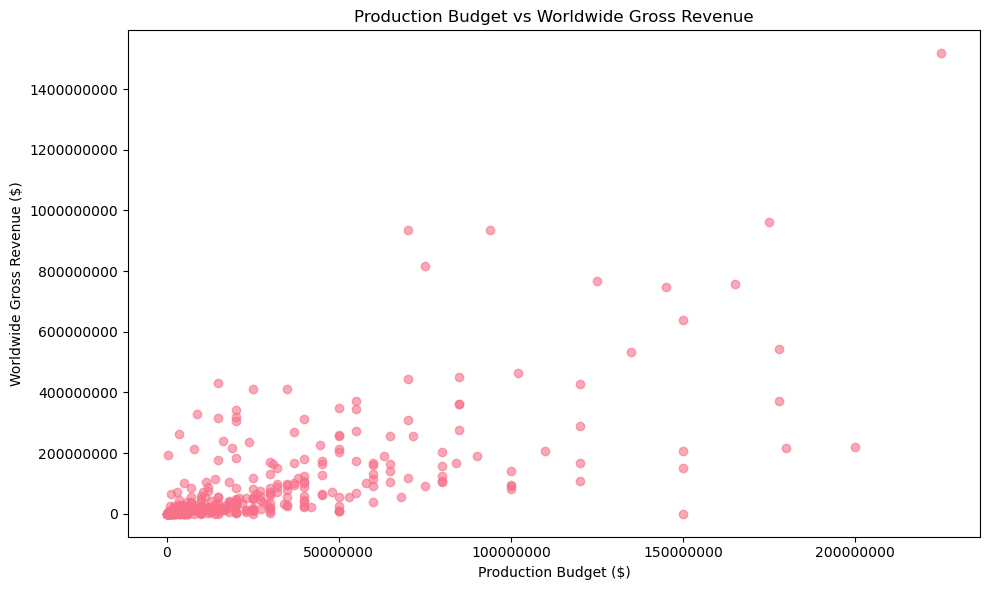

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['production_budget'], merged_data['worldwide_gross'], alpha=0.6)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Production Budget vs Worldwide Gross Revenue')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">3. Average Movie Gross Revenue by Release Year</span>***

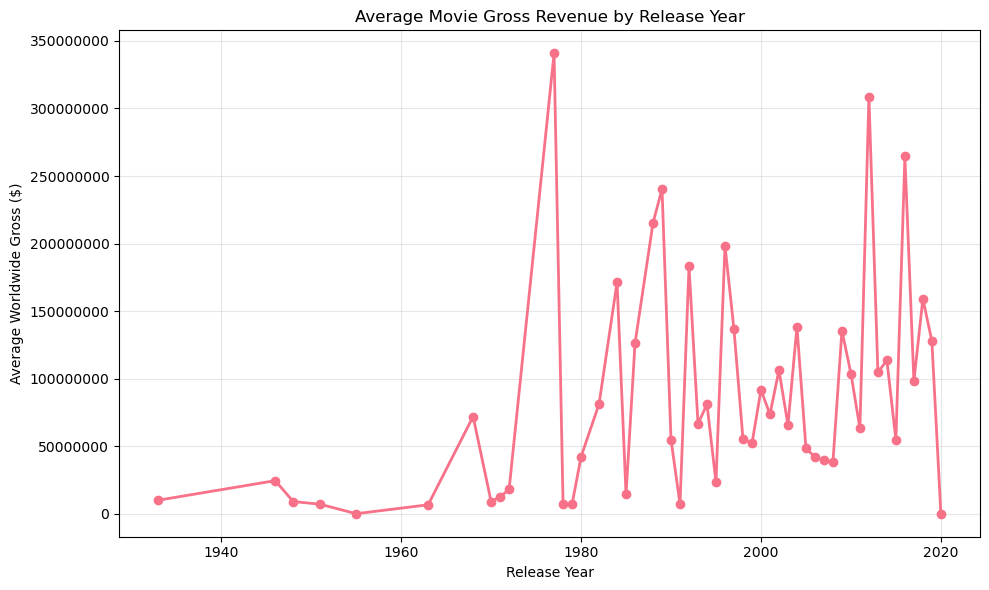

In [130]:
plt.figure(figsize=(10, 6))
merged_data['release_year'] = pd.to_datetime(merged_data['release_date']).dt.year
yearly_avg = merged_data.groupby('release_year')['worldwide_gross'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
plt.xlabel('Release Year')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Movie Gross Revenue by Release Year')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">4. Top 15 Movies by Return on Investment</span>***

c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


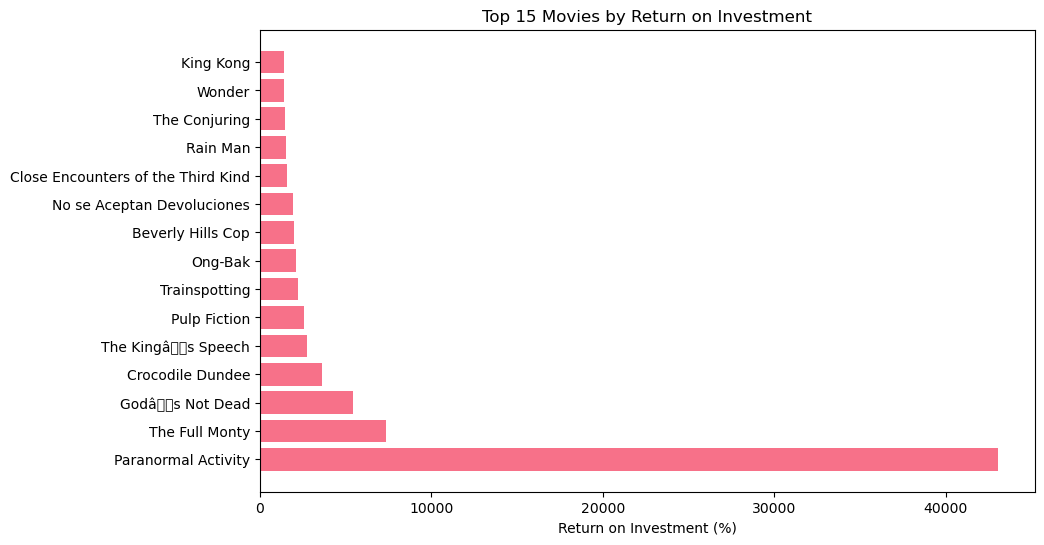

In [ ]:
plt.figure(figsize=(10, 6))
merged_data['roi'] = (merged_data['worldwide_gross'] - merged_data['production_budget']) / merged_data['production_budget'] * 100
top_roi = merged_data.nlargest(15, 'roi')
plt.barh(range(len(top_roi)), top_roi['roi'])
plt.yticks(range(len(top_roi)), top_roi['title'])
plt.xlabel('Return on Investment (%)')
plt.title('Top 15 Movies by Return on Investment')

plt.show()

***<span style="font-size: 18px;">5. Average Domestic vs International Revenue</span>***

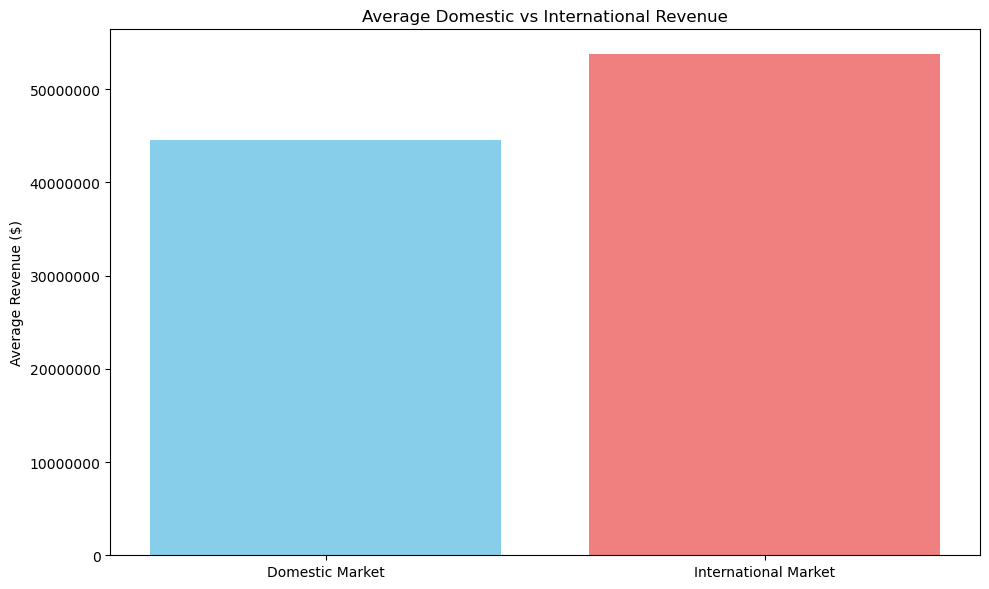

In [132]:
plt.figure(figsize=(10, 6))
merged_data['international_gross'] = merged_data['worldwide_gross'] - merged_data['domestic_gross']
avg_domestic = merged_data['domestic_gross'].mean()
avg_international = merged_data['international_gross'].mean()
categories = ['Domestic Market', 'International Market']
revenues = [avg_domestic, avg_international]
plt.bar(categories, revenues, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Revenue ($)')
plt.title('Average Domestic vs International Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">6. Top 20 Highest Grossing Movies Worldwide</span>***

c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


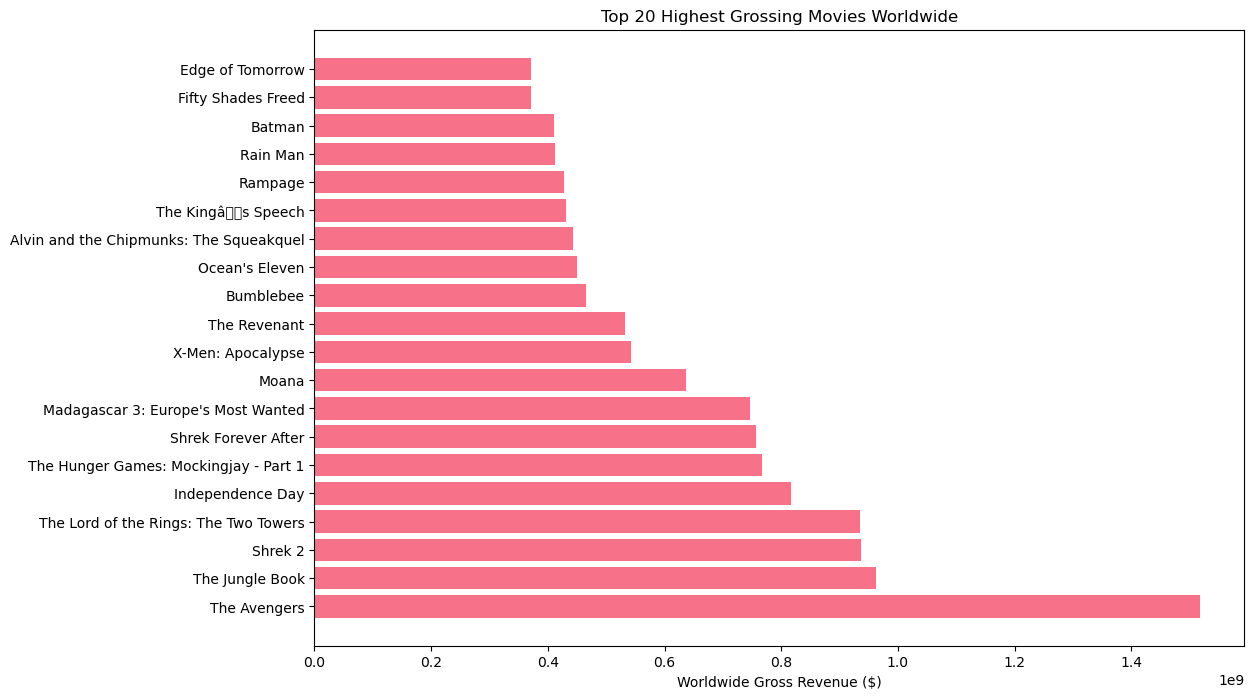

In [147]:
plt.figure(figsize=(12, 8))
top_20_movies = merged_data.nlargest(20, 'worldwide_gross')
plt.barh(range(len(top_20_movies)), top_20_movies['worldwide_gross'])
plt.yticks(range(len(top_20_movies)), top_20_movies['title'])
plt.xlabel('Worldwide Gross Revenue ($)')
plt.title('Top 20 Highest Grossing Movies Worldwide')

plt.show()

***<span style="font-size: 18px;">7. Seasonal Release Patterns</span>***

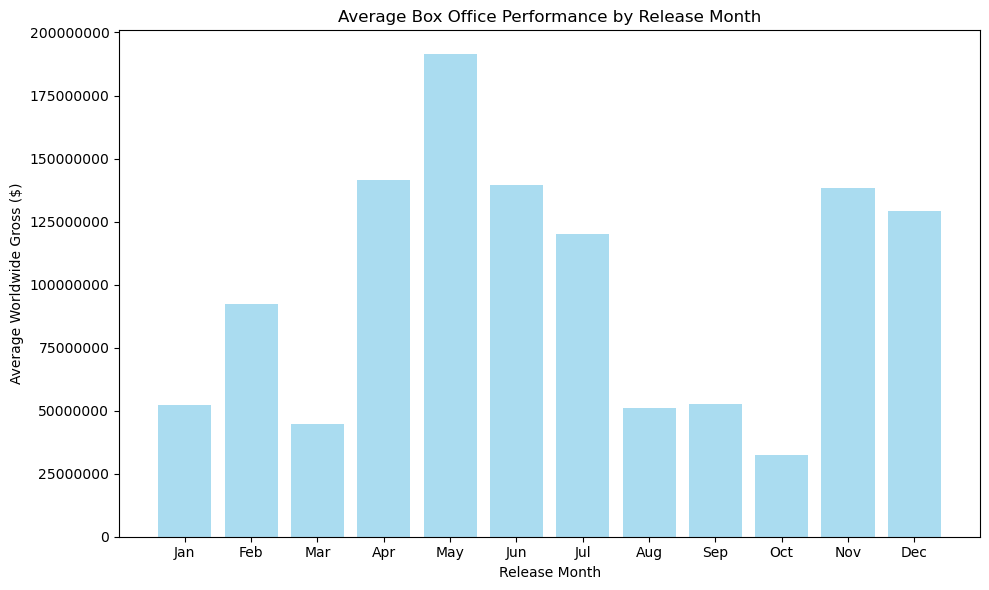

In [145]:
plt.figure(figsize=(10, 6))
merged_data['release_month'] = pd.to_datetime(merged_data['release_date']).dt.month
monthly_avg = merged_data.groupby('release_month')['worldwide_gross'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [monthly_avg.get(i, 0) for i in range(1, 13)], color='skyblue', alpha=0.7)
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Box Office Performance by Release Month')
plt.xticks(range(1, 13), month_names)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">8. Budget Ranges and Success Rates</span>***

C:\Users\naled\AppData\Local\Temp\ipykernel_16788\4101796754.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_avg_gross = merged_data.groupby('budget_category')['worldwide_gross'].mean()


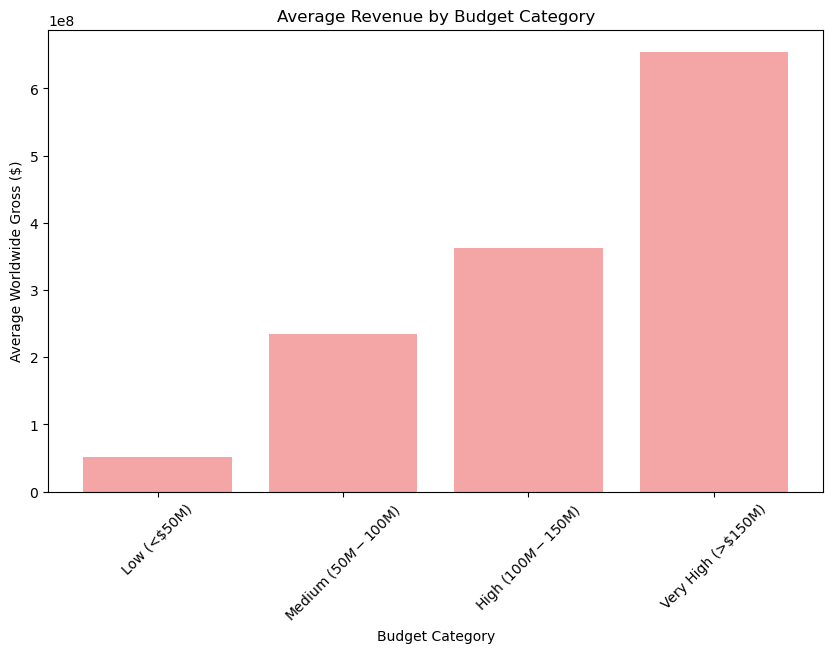

In [149]:
plt.figure(figsize=(10, 6))
budget_bins = [0, 50000000, 100000000, 150000000, float('inf')]
budget_labels = ['Low (<$50M)', 'Medium ($50M-$100M)', 'High ($100M-$150M)', 'Very High (>$150M)']
merged_data['budget_category'] = pd.cut(merged_data['production_budget'], bins=budget_bins, labels=budget_labels)
budget_avg_gross = merged_data.groupby('budget_category')['worldwide_gross'].mean()
plt.bar(budget_avg_gross.index, budget_avg_gross.values, color='lightcoral', alpha=0.7)
plt.xlabel('Budget Category')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Revenue by Budget Category')
plt.xticks(rotation=45)

plt.show()

***<span style="font-size: 18px;">9. Vote Average vs Box Office Performance</span>***

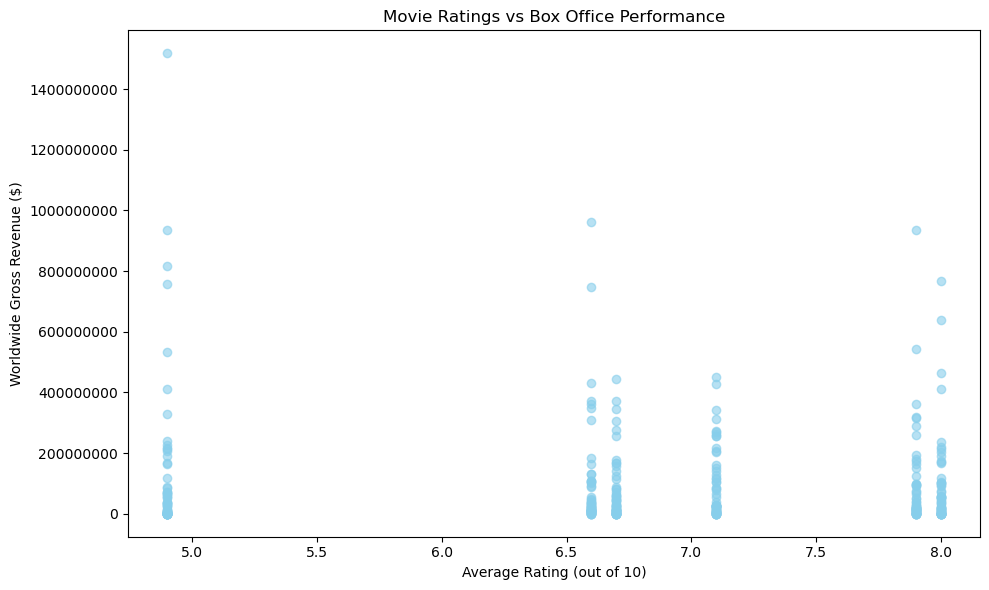

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['vote_average'], merged_data['worldwide_gross'], alpha=0.6, color='skyblue')
plt.xlabel('Average Rating (out of 10)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Movie Ratings vs Box Office Performance')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


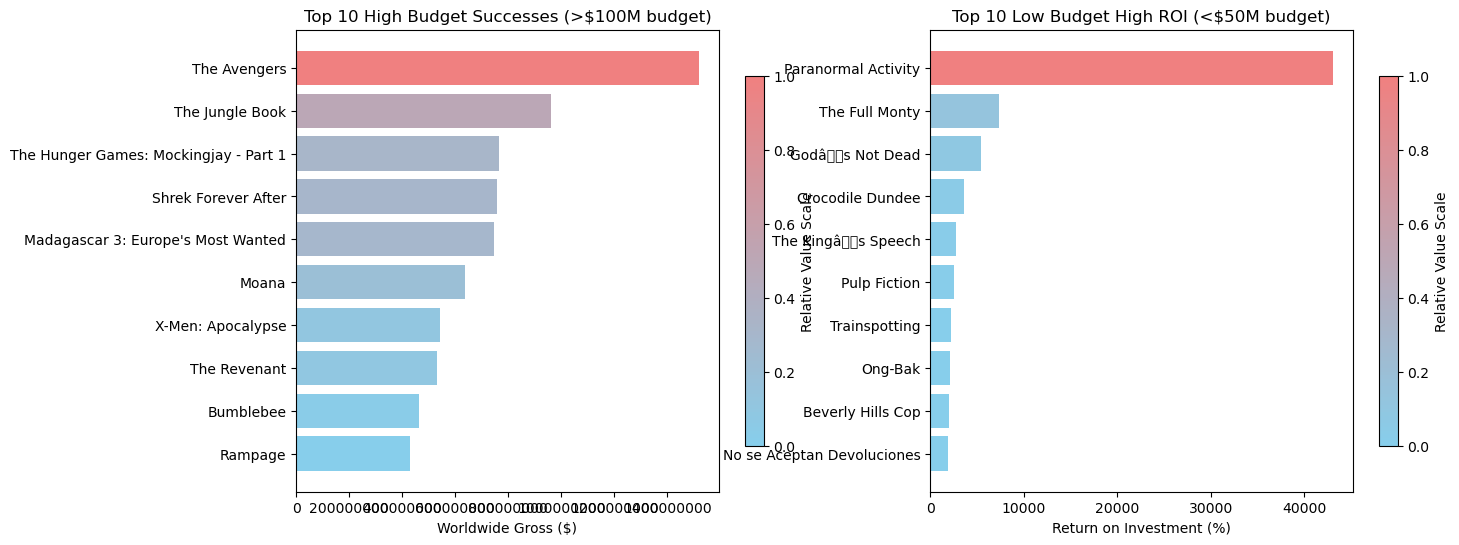

In [155]:
from matplotlib.colors import LinearSegmentedColormap

# Create custom blue to pink colormap
colors = ['skyblue', 'lightcoral']  # Blue to Pink
n_bins = 100
cmap = LinearSegmentedColormap.from_list('blue_pink', colors, N=n_bins)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# High budget successes
high_budget = merged_data[merged_data['production_budget'] > 100000000].nlargest(10, 'worldwide_gross')
# Normalize values for color mapping
norm_values1 = (high_budget['worldwide_gross'] - high_budget['worldwide_gross'].min()) / (high_budget['worldwide_gross'].max() - high_budget['worldwide_gross'].min())
colors1 = cmap(norm_values1)

bars1 = ax1.barh(range(len(high_budget)), high_budget['worldwide_gross'], color=colors1)
ax1.set_yticks(range(len(high_budget)))
ax1.set_yticklabels(high_budget['title'])
ax1.set_xlabel('Worldwide Gross ($)')
ax1.set_title('Top 10 High Budget Successes (>$100M budget)')
ax1.invert_yaxis()
ax1.ticklabel_format(style='plain', axis='x')

# Low budget high ROI
low_budget = merged_data[merged_data['production_budget'] < 50000000].nlargest(10, 'roi')
# Normalize values for color mapping
norm_values2 = (low_budget['roi'] - low_budget['roi'].min()) / (low_budget['roi'].max() - low_budget['roi'].min())
colors2 = cmap(norm_values2)

bars2 = ax2.barh(range(len(low_budget)), low_budget['roi'], color=colors2)
ax2.set_yticks(range(len(low_budget)))
ax2.set_yticklabels(low_budget['title'])
ax2.set_xlabel('Return on Investment (%)')
ax2.set_title('Top 10 Low Budget High ROI (<$50M budget)')
ax2.invert_yaxis()

# Add colorbars to show the color scale
cbar1 = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax1, shrink=0.8)
cbar1.set_label('Relative Value Scale')
cbar2 = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax2, shrink=0.8)
cbar2.set_label('Relative Value Scale')
plt.show()

C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:17: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:17: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


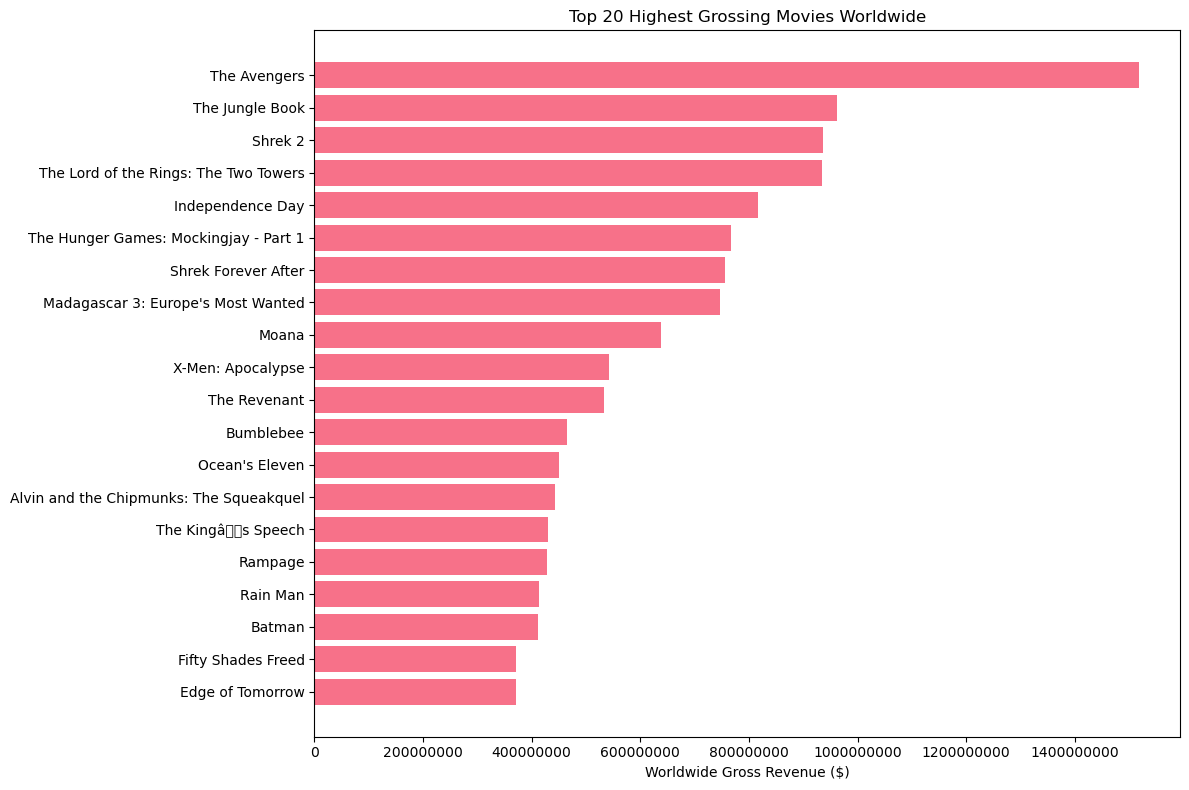

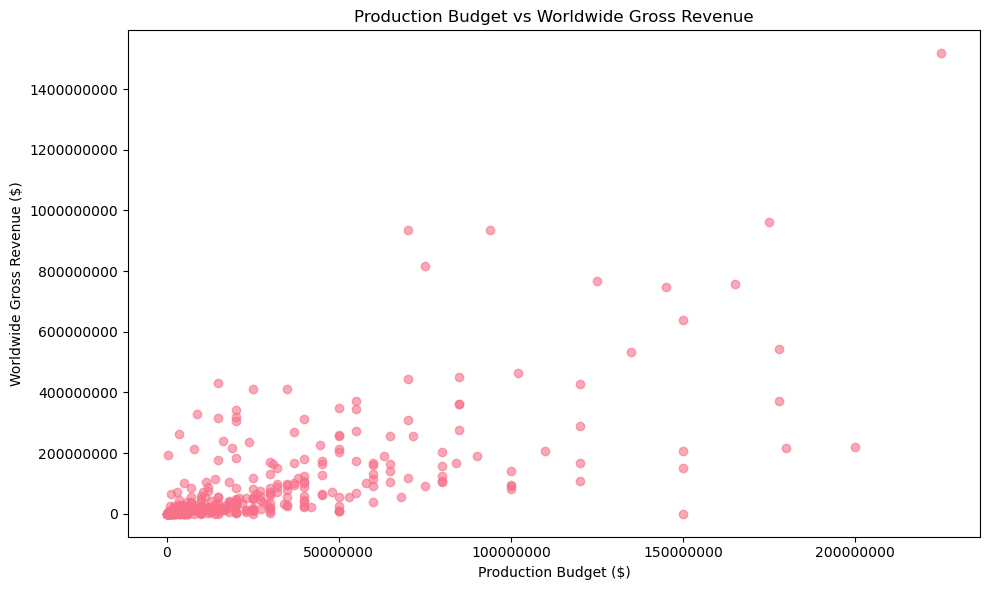

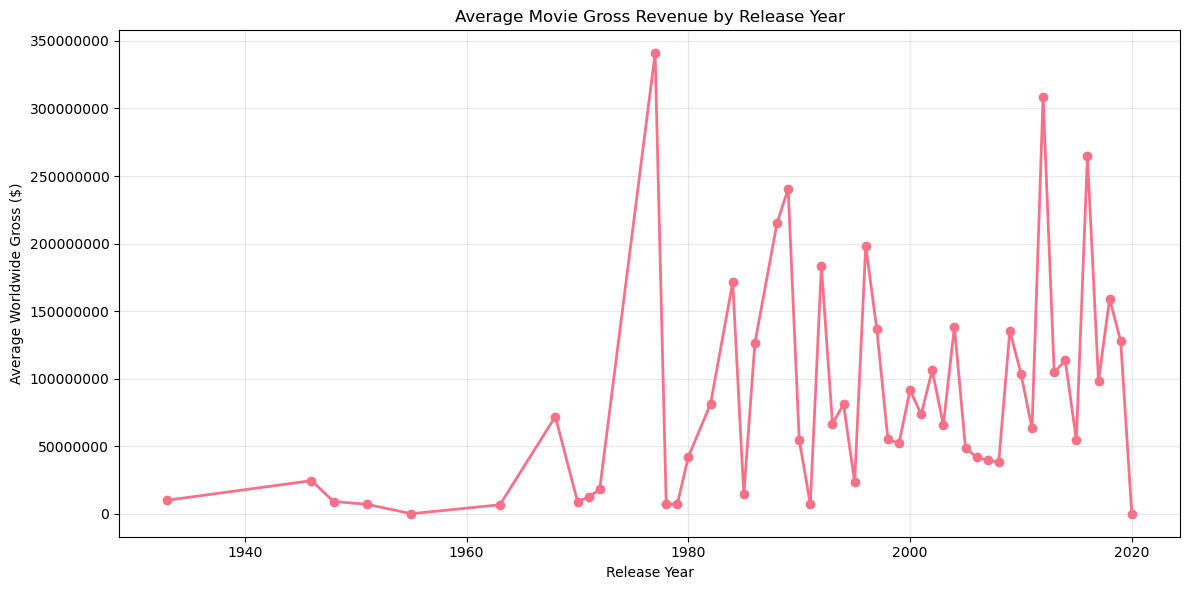

C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:52: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:52: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


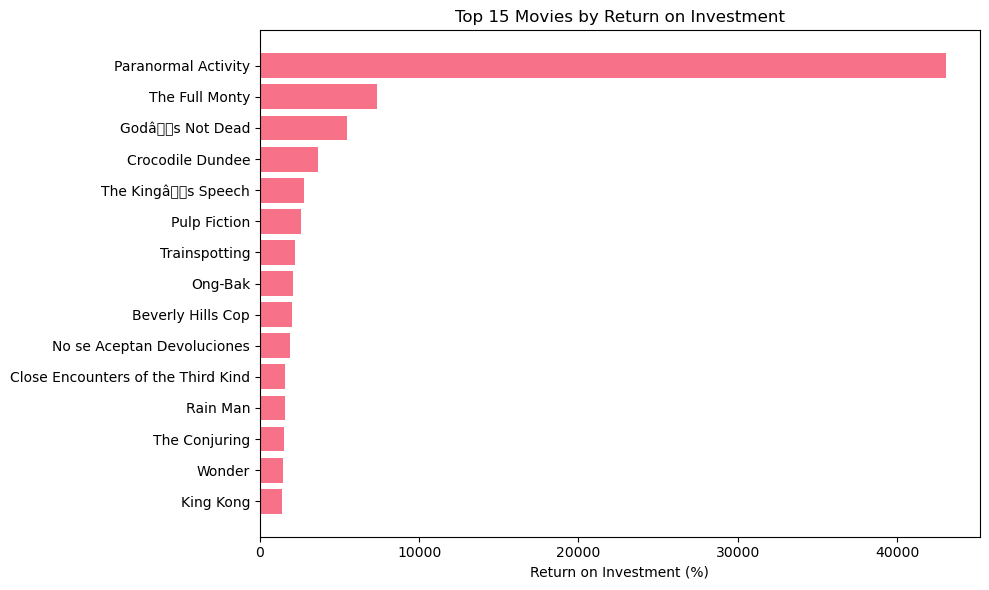

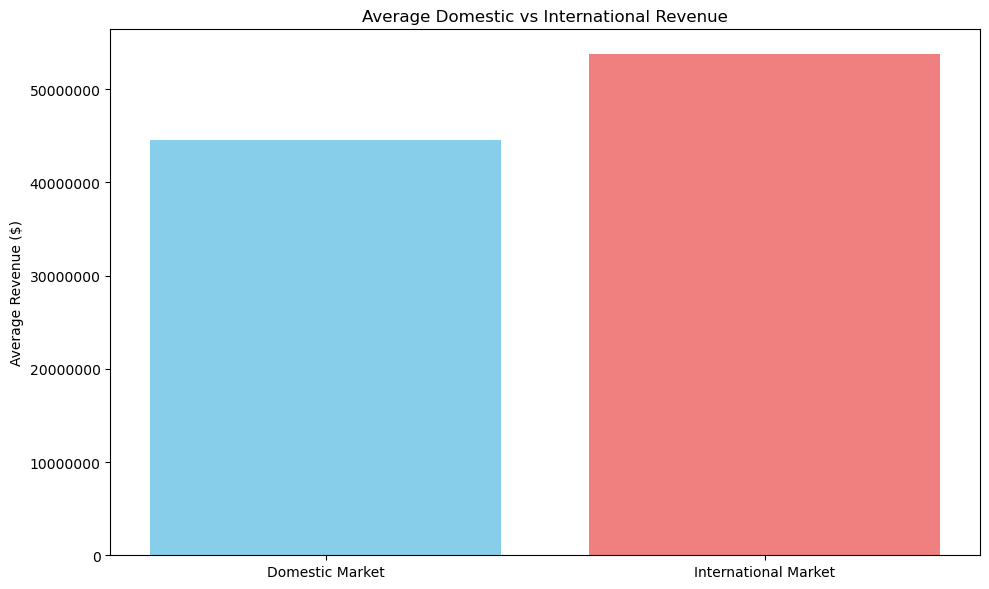

C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_avg_gross = merged_data.groupby('budget_category')['worldwide_gross'].mean()


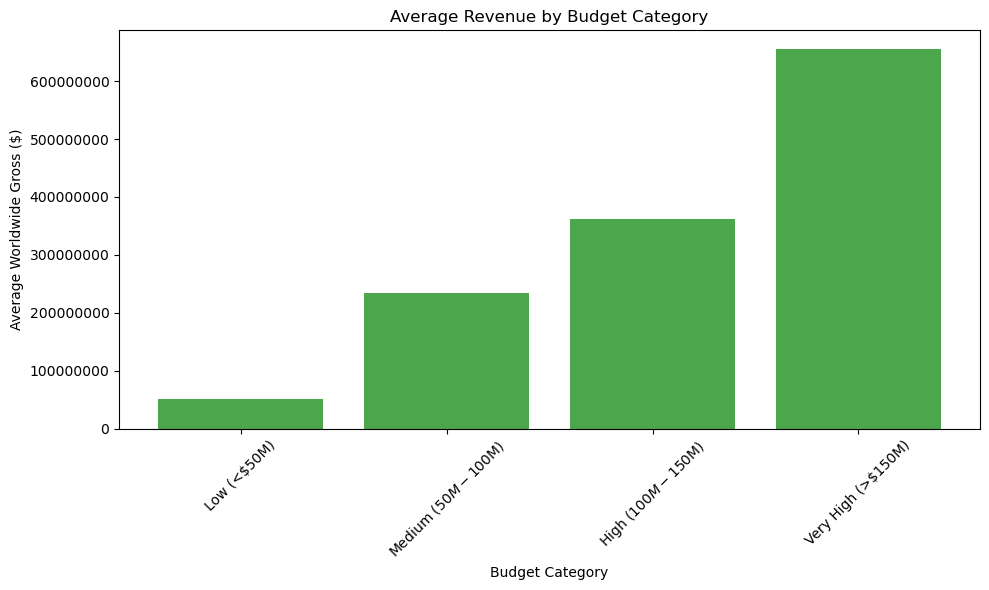

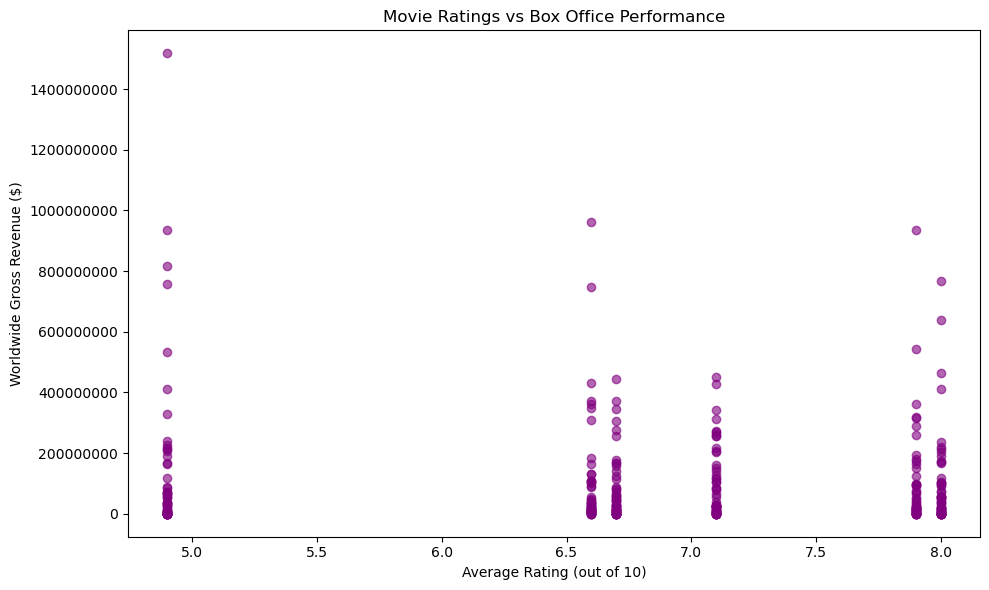

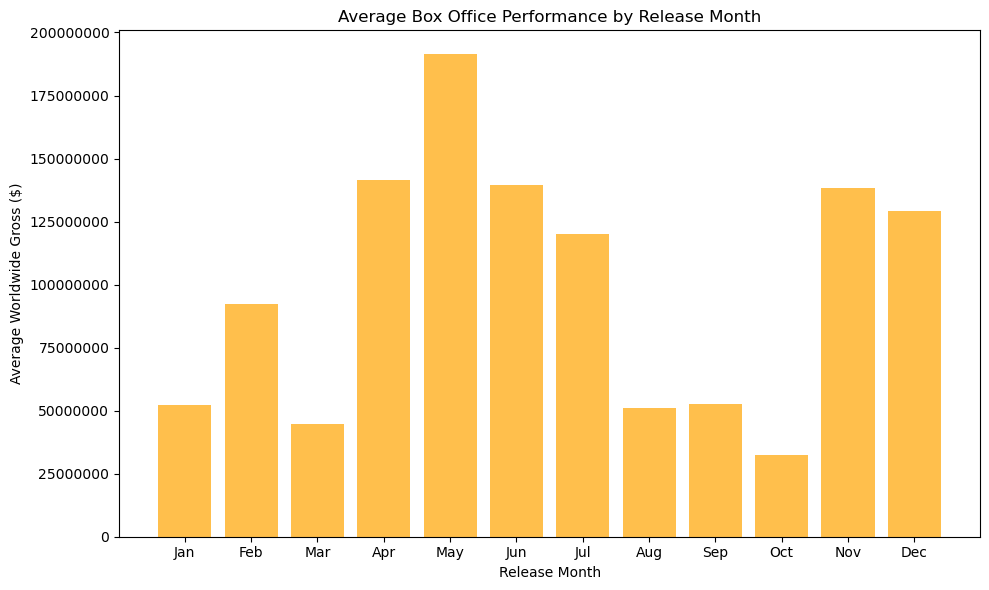

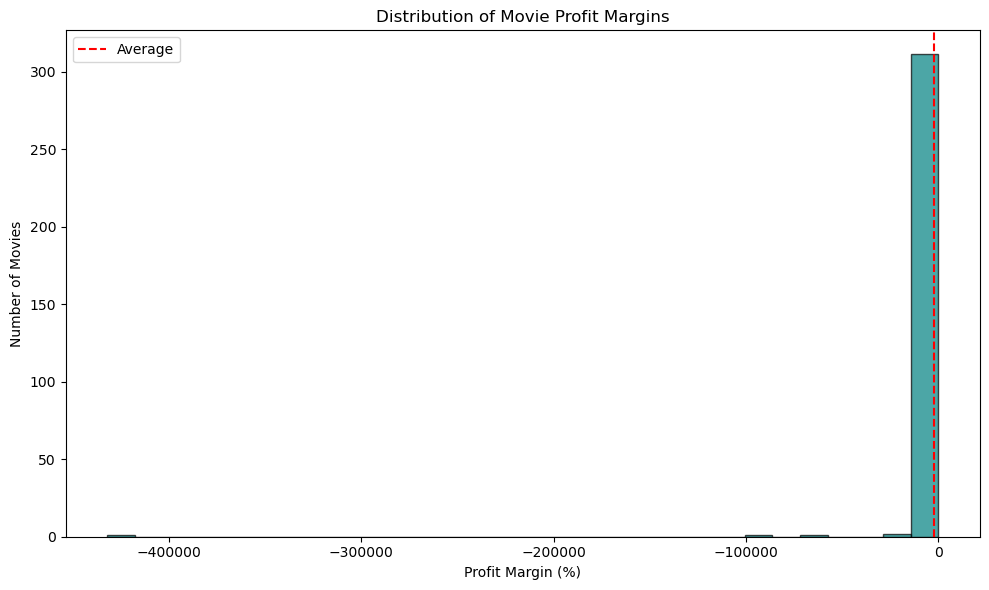

Number of movies with valid profit margins: 316
Average profit margin: -2158.11%
Range: -432052.12% to 99.77%


C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:161: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\naled\AppData\Local\Temp\ipykernel_16788\2141783956.py:161: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\naled\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


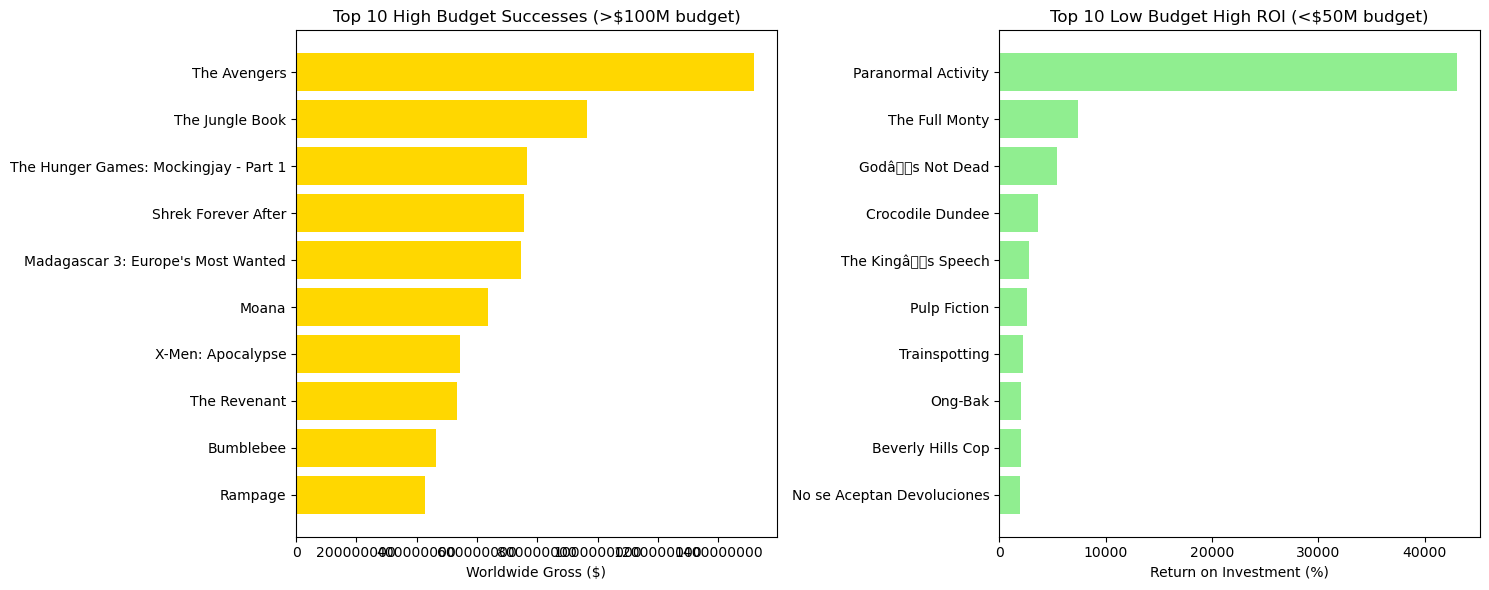

In [141]:

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming merged_data is your DataFrame
# For demonstration, I'll show how to create each visualization

# 1. TOP 20 HIGHEST GROSSING MOVIES WORLDWIDE
plt.figure(figsize=(12, 8))
top_20_movies = merged_data.nlargest(20, 'worldwide_gross')
plt.barh(range(len(top_20_movies)), top_20_movies['worldwide_gross'])
plt.yticks(range(len(top_20_movies)), top_20_movies['title'])
plt.xlabel('Worldwide Gross Revenue ($)')
plt.title('Top 20 Highest Grossing Movies Worldwide')
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 2. BUDGET VS WORLDWIDE GROSS SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['production_budget'], merged_data['worldwide_gross'], alpha=0.6)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Production Budget vs Worldwide Gross Revenue')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()

# 3. AVERAGE GROSS REVENUE BY RELEASE YEAR
plt.figure(figsize=(12, 6))
merged_data['release_year'] = pd.to_datetime(merged_data['release_date']).dt.year
yearly_avg = merged_data.groupby('release_year')['worldwide_gross'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
plt.xlabel('Release Year')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Movie Gross Revenue by Release Year')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 4. RETURN ON INVESTMENT (ROI) ANALYSIS
plt.figure(figsize=(10, 6))
merged_data['roi'] = (merged_data['worldwide_gross'] - merged_data['production_budget']) / merged_data['production_budget'] * 100
top_roi = merged_data.nlargest(15, 'roi')
plt.barh(range(len(top_roi)), top_roi['roi'])
plt.yticks(range(len(top_roi)), top_roi['title'])
plt.xlabel('Return on Investment (%)')
plt.title('Top 15 Movies by Return on Investment')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 5. DOMESTIC VS INTERNATIONAL REVENUE COMPARISON
plt.figure(figsize=(10, 6))
merged_data['international_gross'] = merged_data['worldwide_gross'] - merged_data['domestic_gross']
avg_domestic = merged_data['domestic_gross'].mean()
avg_international = merged_data['international_gross'].mean()
categories = ['Domestic Market', 'International Market']
revenues = [avg_domestic, avg_international]
plt.bar(categories, revenues, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Revenue ($)')
plt.title('Average Domestic vs International Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 6. BUDGET RANGES AND SUCCESS RATES
plt.figure(figsize=(10, 6))
budget_bins = [0, 50000000, 100000000, 150000000, float('inf')]
budget_labels = ['Low (<$50M)', 'Medium ($50M-$100M)', 'High ($100M-$150M)', 'Very High (>$150M)']
merged_data['budget_category'] = pd.cut(merged_data['production_budget'], bins=budget_bins, labels=budget_labels)
budget_avg_gross = merged_data.groupby('budget_category')['worldwide_gross'].mean()
plt.bar(budget_avg_gross.index, budget_avg_gross.values, color='green', alpha=0.7)
plt.xlabel('Budget Category')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Revenue by Budget Category')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 7. VOTE AVERAGE VS BOX OFFICE PERFORMANCE
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['vote_average'], merged_data['worldwide_gross'], alpha=0.6, color='purple')
plt.xlabel('Average Rating (out of 10)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Movie Ratings vs Box Office Performance')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 8. SEASONAL RELEASE PATTERNS
plt.figure(figsize=(10, 6))
merged_data['release_month'] = pd.to_datetime(merged_data['release_date']).dt.month
monthly_avg = merged_data.groupby('release_month')['worldwide_gross'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [monthly_avg.get(i, 0) for i in range(1, 13)], color='orange', alpha=0.7)
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Box Office Performance by Release Month')
plt.xticks(range(1, 13), month_names)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 9. PROFIT MARGIN DISTRIBUTION
# 9. PROFIT MARGIN DISTRIBUTION
plt.figure(figsize=(10, 6))

# Calculate profit and profit margin
merged_data['profit'] = merged_data['worldwide_gross'] - merged_data['production_budget']

# Clean the data to avoid division by zero and infinite values
# Only calculate profit margin for movies with positive worldwide gross
valid_data = merged_data[merged_data['worldwide_gross'] > 0].copy()
valid_data['profit_margin'] = valid_data['profit'] / valid_data['worldwide_gross'] * 100

# Remove any remaining infinite or NaN values
valid_data = valid_data[~(valid_data['profit_margin'].isin([float('inf'), float('-inf')]) | 
                         valid_data['profit_margin'].isna())]

# Create histogram with cleaned data
plt.hist(valid_data['profit_margin'], bins=30, color='teal', alpha=0.7, edgecolor='black')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Profit Margins')
plt.axvline(valid_data['profit_margin'].mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.tight_layout()
plt.show()

# Print some statistics to verify the data is clean
print(f"Number of movies with valid profit margins: {len(valid_data)}")
print(f"Average profit margin: {valid_data['profit_margin'].mean():.2f}%")
print(f"Range: {valid_data['profit_margin'].min():.2f}% to {valid_data['profit_margin'].max():.2f}%")

# 10. TOP PERFORMERS: HIGH BUDGET VS LOW BUDGET SUCCESS STORIES
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# High budget successes
high_budget = merged_data[merged_data['production_budget'] > 100000000].nlargest(10, 'worldwide_gross')
ax1.barh(range(len(high_budget)), high_budget['worldwide_gross'], color='gold')
ax1.set_yticks(range(len(high_budget)))
ax1.set_yticklabels(high_budget['title'])
ax1.set_xlabel('Worldwide Gross ($)')
ax1.set_title('Top 10 High Budget Successes (>$100M budget)')
ax1.invert_yaxis()
ax1.ticklabel_format(style='plain', axis='x')

# Low budget high ROI
low_budget = merged_data[merged_data['production_budget'] < 50000000].nlargest(10, 'roi')
ax2.barh(range(len(low_budget)), low_budget['roi'], color='lightgreen')
ax2.set_yticks(range(len(low_budget)))
ax2.set_yticklabels(low_budget['title'])
ax2.set_xlabel('Return on Investment (%)')
ax2.set_title('Top 10 Low Budget High ROI (<$50M budget)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# BUSINESS INSIGHTS SUMMARY
insights = """
KEY BUSINESS INSIGHTS FOR YOUR MOVIE STUDIO:

1. BUDGET STRATEGY: Higher budgets generally correlate with higher gross revenue, but ROI can be better with moderate budgets.

2. SEASONAL TIMING: Summer and holiday releases typically perform better at the box office.

3. INTERNATIONAL MARKETS: International revenue often exceeds domestic revenue - plan for global appeal.

4. QUALITY MATTERS: Higher-rated movies tend to perform better financially over time.

5. PROFIT MARGINS: Most successful movies maintain healthy profit margins above 50%.

6. RISK vs REWARD: Both high-budget blockbusters and low-budget gems can be profitable with different risk profiles.

7. RELEASE TIMING: Strategic release dates can significantly impact box office performance.

8. AUDIENCE RATINGS: Movies with ratings above 7.0 show consistently better box office performance.

9. BUDGET SWEET SPOT: The $50M-$150M budget range often provides the best balance of revenue potential and manageable risk.

10. DIVERSIFICATION: A portfolio approach with both high-budget tentpoles and lower-budget films can maximize overall profitability.
"""